https://docs.astropy.org/en/stable/io/fits/index.html

## imports

In [49]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.io import fits

## open file

In [50]:

image_file = fits.open("data_test/test_photo.fits")
image_file.info()


Filename: data_test/test_photo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     258   (100, 100)   float32   


In [51]:
fits.info("data_test/test_photo.fits")

Filename: data_test/test_photo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     258   (100, 100)   float32   


## open only the data

In [52]:
image_data = fits.getdata("data_test/test_photo.fits", ext=0)
print(image_data.shape)

(100, 100)


## open only the headers

In [53]:
image_head = fits.getheader("data_test/test_photo.fits")
print(len(image_head))
image_head.keys
# print(image_head)

258


<bound method Header.keys of SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  100 / length of data axis 1                          
NAXIS2  =                  100 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel December 2001' / FITS file originator    
DATE    = '2003-07-24T18:28:58' / Date FITS file was generated                  
IRAF-TLM= '10:28:58 (24/07/2003)' / Time of last modification                   
OBJECT  = 'U5780205B[1/4]'     / Name of the object observed                    

## show to the screen via plt

C:\Users\5D12~1\AppData\Local\Temp/ipykernel_10844/740030735.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


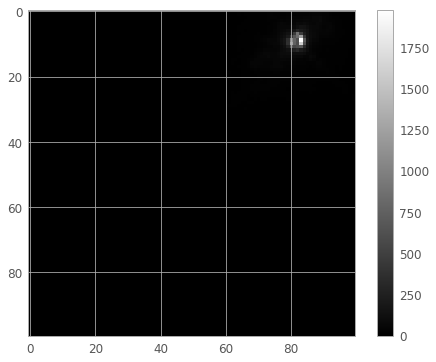

In [54]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

## write to the file

In [55]:
# can be done with:
# image_file.writeto("data_test/test_write.fits")

# all changes are saving to the file at close or at flush
with fits.open('data_test/test_photo.fits', mode='update') as hdul:
    hdr = hdul[0].header # get headers

    print(hdr['comment'][-1]) # take only the last comment header
    hdr['comment'][-1] = "test new comment" # apply text
    print(hdul[0].header['comment'][-1]) #print from the main

    hdul.flush()  # changes are written back to original.fits

    hdr.set("ttt",'its a test') # add new header or replace exist
    print(hdr["ttt"]) # if header doesn't exist it throw error so try catch
    
    print(hdr[-1]) #show the last header
    
# closing the file will also flush any changes and prevent further writing

# if you do somthing like:
# hdr['comment'] = 'Edwin Hubble really knew his stuff'
# it append new one because:
# Comment or history records are added like normal cards, though in their case a new card is always created, rather than updating an existing HISTORY or COMMENT card

hdr
test new comment
its a test
test new comment


In [56]:
image_file.close()